In [80]:
import numpy as np
from sklearn.metrics import auc, classification_report,confusion_matrix
from sklearn import datasets
from sklearn.linear_model import LogisticRegression,LinearRegression
import sklearn.cross_validation as crossValidation
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline 

# Train-Test Splitting Algorithms 
1) Holdout Method
2) Leave-One-Out Method 
3) K-Fold Cross Validation Method

# Holdout Method 

In [65]:
iris = datasets.load_iris()  # Load Iris dataset
# split the dataset into 40% Testing and 60% Training 
X_train, X_test, y_train, y_test = crossValidation.train_test_split(iris.data, iris.target,\
                                                    test_size=0.4, random_state=100)

# Leave-One-Out Method 

In [45]:
iris = datasets.load_iris() # Load Iris dataset
# Leave one out 
loo = crossValidation.LeaveOneOut(iris.data.shape[0])
for train_index, test_index in loo:
    print("TRAIN:", train_index, "TEST:", test_index) # print the indices of the selected 

# K-Fold Cross Validation 

In [25]:
iris = datasets.load_iris()
seed = 10   # seed for random number generator in order to reproduce the results
kf = crossValidation.KFold(n = iris.data.shape[0], n_folds=5,shuffle=True,random_state=seed)
for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)

# Supervised Classifier Evaluation 

# Accuracy Metric

In [29]:
iris = datasets.load_iris()
penalty = 'l1'
seed = 10
epochs = 500
multiclass = 'ovr'  # multiclass algorithm 
n_jobs = -1          # to invoke all the CPUs
model = LogisticRegression(penalty=penalty,max_iter=epochs,random_state=seed,\
                           multi_class=multiclass,n_jobs = n_jobs)
scoring = 'accuracy'
seed = 10
kfold = crossValidation.KFold(n = iris.data.shape[0], n_folds=5,shuffle=True,random_state=seed)
results = crossValidation.cross_val_score(model, iris.data, iris.target, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: 0.953 (0.040)


# Negative Logarithmic Loss

In [39]:
iris = datasets.load_iris()
penalty = 'l2'
seed = 10
epochs = 500
multiclass = 'ovr'
n_jobs = -1
model = LogisticRegression(penalty=penalty,max_iter=epochs,random_state=seed,\
                           multi_class=multiclass,n_jobs = n_jobs)
scoring = 'neg_log_loss'
seed = 10
kfold = crossValidation.KFold(n = iris.data.shape[0], n_folds=5,shuffle=True,random_state=seed)
results = crossValidation.cross_val_score(model, iris.data, iris.target, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())

Logloss: -0.335 (0.043)


# Area Under The ROC Curve

In [46]:
iris = datasets.load_iris()
penalty = 'l2'
seed = 10
epochs = 500
n_jobs = -1
model = LogisticRegression(penalty=penalty,max_iter=epochs,random_state=seed,\
                           n_jobs = n_jobs)
scoring = 'roc_auc'
seed = 10
kfold = crossValidation.KFold(n = 100, n_folds=5,shuffle=True,random_state=seed)
results = crossValidation.cross_val_score(model, iris.data[:100,:], iris.target[:100], cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)") % (results.mean(), results.std())

AUC: 1.000 (0.000)


# Classification Report

In [50]:
iris = datasets.load_iris()
penalty = 'l2'
seed = 10
epochs = 500
multiclass = 'ovr'
n_jobs = -1
test_size = 0.33
model = LogisticRegression(penalty=penalty,max_iter=epochs,random_state=seed,\
                           multi_class=multiclass,n_jobs = n_jobs)
X_train, X_test, Y_train, Y_test = crossValidation.train_test_split(iris.data, iris.target\
                                                                    , test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.63      0.77        19
          2       0.70      1.00      0.82        16

avg / total       0.90      0.86      0.86        50



# Confusion Matrix

In [53]:
iris = datasets.load_iris()
penalty = 'l2'
seed = 10
epochs = 500
multiclass = 'ovr'
n_jobs = -1
test_size = 0.33
model = LogisticRegression(penalty=penalty,max_iter=epochs,random_state=seed,\
                           multi_class=multiclass,n_jobs = n_jobs)
X_train, X_test, Y_train, Y_test = crossValidation.train_test_split(iris.data, iris.target\
                                                                    , test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(Y_test, predicted)
print(conf)

[[15  0  0]
 [ 0 12  7]
 [ 0  0 16]]


# Regression Metrics

# Negative Mean Absolute Error

In [62]:
diabetes = datasets.load_diabetes()   # load diabetes dataset
n_jobs = -1
seed = 10
model = LinearRegression(n_jobs=n_jobs)
scoring = 'neg_mean_absolute_error'
kfold = crossValidation.KFold(n = diabetes.data.shape[0], n_folds=5,shuffle=True,\
                              random_state=seed)
results = crossValidation.cross_val_score(model, diabetes.data, diabetes.target,\
                                           cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

MAE: -44.769 (3.609)


# Negative Mean Square Error

In [61]:
diabetes = datasets.load_diabetes()   # load diabetes dataset
n_jobs = -1
seed = 10
model = LinearRegression(n_jobs=n_jobs)
scoring = 'neg_mean_squared_error'
kfold = crossValidation.KFold(n = diabetes.data.shape[0], n_folds=5,shuffle=True,\
                              random_state=seed)
results = crossValidation.cross_val_score(model, diabetes.data, diabetes.target,\
                                           cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -3046.647 (448.451)


# R^2

In [63]:
diabetes = datasets.load_diabetes()   # load diabetes dataset
n_jobs = -1
seed = 10
model = LinearRegression(n_jobs=n_jobs)
scoring = 'r2'
kfold = crossValidation.KFold(n = diabetes.data.shape[0], n_folds=5,shuffle=True,\
                              random_state=seed)
results = crossValidation.cross_val_score(model, diabetes.data, diabetes.target,\
                                           cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

R^2: 0.481 (0.083)


# Learning Curves

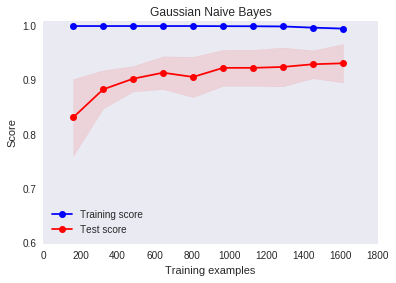

In [93]:
#learning_curve()
digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()

train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=10, n_jobs=1, train_sizes=np.linspace(.1, 1., 10), verbose=0)
 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
 
plt.figure()
plt.title("Gaussian Naive Bayes")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.gca().invert_yaxis()
plt.grid()
 
# Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")
 
# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")

# Draw the plot and reset the y-axis
plt.legend(loc="best")
plt.gca().invert_yaxis()